[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


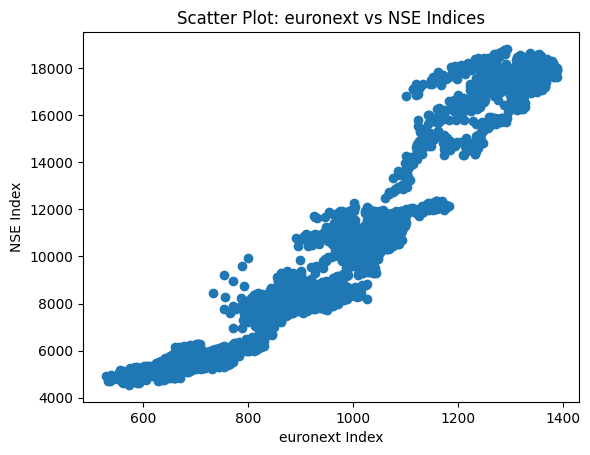

The correlation coefficient between euronext and NSE indices is 0.95.
The relationship has a strong positive correlation.
The relationship is positive.


In [19]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the ticker symbols for Euronext and NSE
euronext_ticker = "^N100"
nse_ticker = "^NSEI"

# Fetch historical data using yfinance
euronext_data = yf.download(euronext_ticker, start="2010-01-01", end="2023-06-03")
nse_data = yf.download(nse_ticker, start="2010-01-01", end="2023-06-03")

# Select only the "Close" prices for correlation analysis
euronext_close = euronext_data["Close"]
nse_close = nse_data["Close"]

# Align the data to ensure matching lengths
euronext_close, nse_close = euronext_close.align(nse_close, join='inner')

# Calculate the correlation coefficient
correlation_coefficient = euronext_close.corr(nse_close)

# Step 3: Analyze the strength and direction of the relationship
if correlation_coefficient > 0:
    strength = 'strong positive'
    direction = 'positive'
elif correlation_coefficient < 0:
    strength = 'strong negative'
    direction = 'negative'
else:
    strength = 'no'
    direction = 'no'

# Step 4: Plot a scatter plot to visualize the relationship
plt.scatter(euronext_close, nse_close)
plt.xlabel('euronext Index')
plt.ylabel('NSE Index')
plt.title('Scatter Plot: euronext vs NSE Indices')
plt.show()

print(f"The correlation coefficient between euronext and NSE indices is {correlation_coefficient:.2f}.")
print(f"The relationship has a {strength} correlation.")
print(f"The relationship is {direction}.")


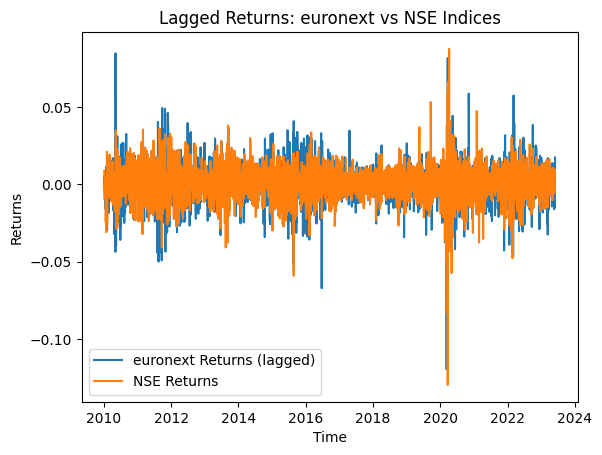

The correlation between lagged returns of euronext and current returns of NSE is -0.07.
The lead-lag relationship suggests that NSE leads euronext.


In [20]:
euronext_data['Returns'] = euronext_data['Close'].pct_change()
nse_data['Returns'] = nse_data['Close'].pct_change()

# Step 3: Analyze data for consistent leading or lagging behavior
# Calculate the correlation between the lagged returns of euronext and current returns of NSE
lag = 1  # Define the lag period
correlation = euronext_data['Returns'].shift(-lag).corr(nse_data['Returns'])

if correlation > 0:
    relationship = 'euronext leads NSE'
elif correlation < 0:
    relationship = 'NSE leads euronext'
else:
    relationship = 'No consistent lead-lag relationship'

# Step 4: Plot the lagged returns to visualize the relationship
plt.plot(euronext_data['Returns'].shift(-lag), label='euronext Returns (lagged)')
plt.plot(nse_data['Returns'], label='NSE Returns')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.title('Lagged Returns: euronext vs NSE Indices')
plt.legend()
plt.show()

print(f"The correlation between lagged returns of euronext and current returns of NSE is {correlation:.2f}.")
print(f"The lead-lag relationship suggests that {relationship}.")


In [21]:
pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from ta.volatility import KeltnerChannel
from ta.volatility import BollingerBands
from ta.trend import MACD


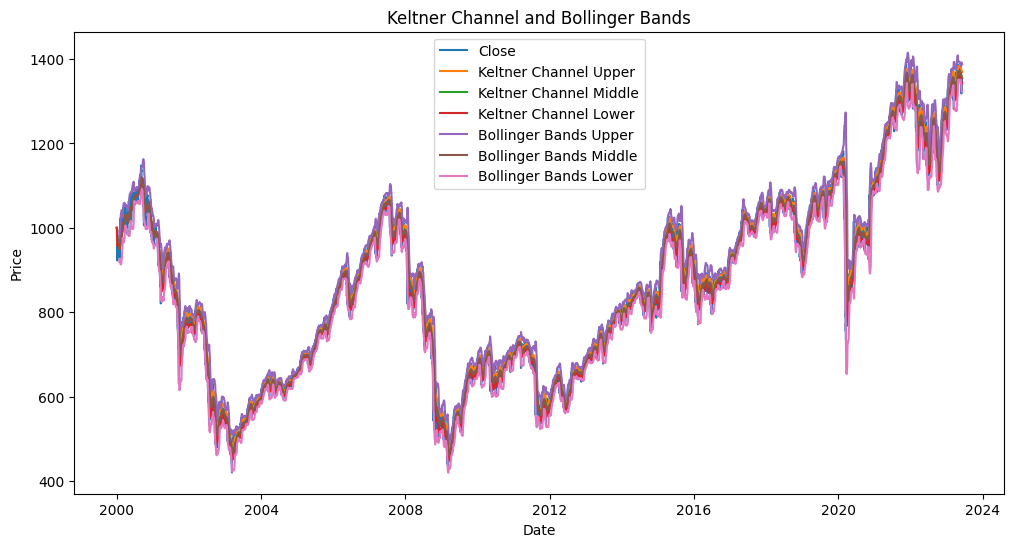

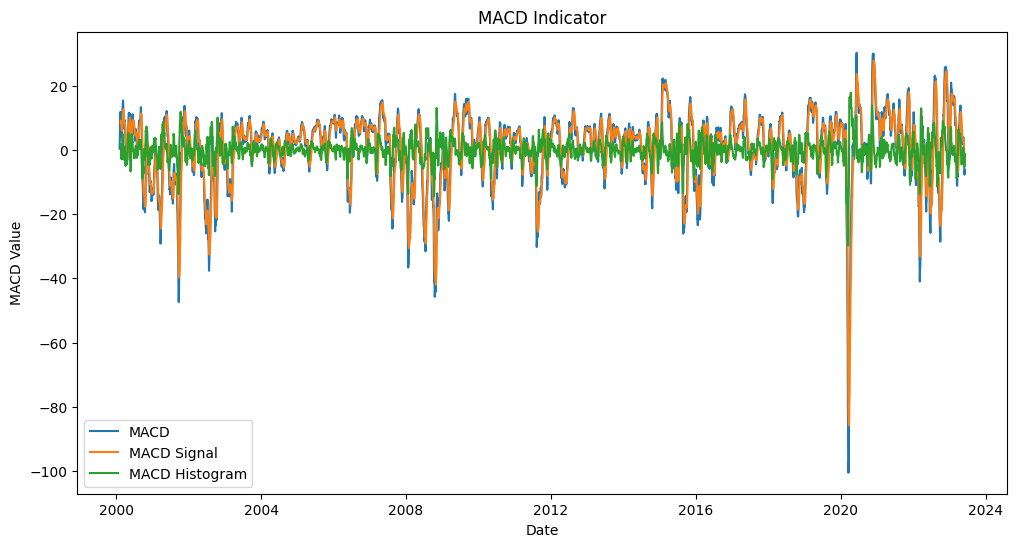

In [23]:
index_ticker = yf.Ticker('^N100') 
historical_data = index_ticker.history(period='max')

kc = KeltnerChannel(historical_data['High'], historical_data['Low'], historical_data['Close'], window=20, window_atr=10)
historical_data['KC_Upper'] = kc.keltner_channel_hband()
historical_data['KC_Middle'] = kc.keltner_channel_mband()
historical_data['KC_Lower'] = kc.keltner_channel_lband()

# Step 3: Calculate Bollinger Bands
bb = BollingerBands(historical_data['Close'], window=20, window_dev=2)
historical_data['BB_Upper'] = bb.bollinger_hband()
historical_data['BB_Middle'] = bb.bollinger_mavg()
historical_data['BB_Lower'] = bb.bollinger_lband()

# Step 4: Calculate MACD
macd = MACD(historical_data['Close'])
historical_data['MACD'] = macd.macd()
historical_data['MACD_Signal'] = macd.macd_signal()
historical_data['MACD_Hist'] = macd.macd_diff()

# Step 5: Plotting the indicators
plt.figure(figsize=(12, 6))
plt.plot(historical_data['Close'], label='Close')
plt.plot(historical_data['KC_Upper'], label='Keltner Channel Upper')
plt.plot(historical_data['KC_Middle'], label='Keltner Channel Middle')
plt.plot(historical_data['KC_Lower'], label='Keltner Channel Lower')
plt.plot(historical_data['BB_Upper'], label='Bollinger Bands Upper')
plt.plot(historical_data['BB_Middle'], label='Bollinger Bands Middle')
plt.plot(historical_data['BB_Lower'], label='Bollinger Bands Lower')
plt.legend()
plt.title('Keltner Channel and Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(historical_data['MACD'], label='MACD')
plt.plot(historical_data['MACD_Signal'], label='MACD Signal')
plt.plot(historical_data['MACD_Hist'], label='MACD Histogram')
plt.legend()
plt.title('MACD Indicator')
plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.show()


In [24]:
#TASK4
# Step 1: Collect historical data for an index
index_ticker = yf.Ticker('^N100')  # Change to the desired index ticker
stock_data = index_ticker.history(period='max')

# Step 2: Define the parameter ranges to optimize
parameter_ranges = {
    'kc_timeperiod': range(10, 31, 5),
    'bb_timeperiod': range(10, 31, 5),
    'macd_fastperiod': range(10, 31, 5),
    'macd_slowperiod': range(30, 61, 5),
    'macd_signalperiod': range(5, 21, 5)
}

# Step 3: Perform parameter optimization
best_parameters = None
best_metric = float('-inf')

for kc_timeperiod in parameter_ranges['kc_timeperiod']:

    for bb_timeperiod in parameter_ranges['bb_timeperiod']:

        for macd_fastperiod in parameter_ranges['macd_fastperiod']:

            for macd_slowperiod in parameter_ranges['macd_slowperiod']:

                for macd_signalperiod in parameter_ranges['macd_signalperiod']:

                    strategy_data = stock_data.copy()

                    # Calculate Keltner Channel with current parameters
                    strategy_data['KC_Middle'] = strategy_data['Close'].rolling(window=kc_timeperiod).mean()
                    strategy_data['KC_ATR'] = strategy_data['High'] - strategy_data['Low']
                    strategy_data['KC_Upper'] = strategy_data['KC_Middle'] + (2 * strategy_data['KC_ATR'])
                    strategy_data['KC_Lower'] = strategy_data['KC_Middle'] - (2 * strategy_data['KC_ATR'])

                    # Calculate Bollinger Bands with current parameters
                    strategy_data['BB_Middle'] = strategy_data['Close'].rolling(window=bb_timeperiod).mean()
                    strategy_data['BB_STD'] = strategy_data['Close'].rolling(window=bb_timeperiod).std()
                    strategy_data['BB_Upper'] = strategy_data['BB_Middle'] + (2 * strategy_data['BB_STD'])
                    strategy_data['BB_Lower'] = strategy_data['BB_Middle'] - (2 * strategy_data['BB_STD'])

                    # Calculate MACD with current parameters
                    strategy_data['MACD_Line'] = strategy_data['Close'].ewm(span=macd_fastperiod).mean() - strategy_data['Close'].ewm(span=macd_slowperiod).mean()
                    strategy_data['MACD_Signal'] = strategy_data['MACD_Line'].ewm(span=macd_signalperiod).mean()
                    strategy_data['MACD_Hist'] = strategy_data['MACD_Line'] - strategy_data['MACD_Signal']

                    # Evaluate the strategy performance using a metric (e.g., cumulative returns)
                    strategy_returns = strategy_data['Close'].pct_change().fillna(0)
                    cumulative_returns = (1 + strategy_returns).cumprod()
                    metric = cumulative_returns.iloc[-1]

                    # Update the best parameters and metric if the current combination is better
                    if metric > best_metric:
                        best_parameters = {
                            'kc_timeperiod': kc_timeperiod,
                            'bb_timeperiod': bb_timeperiod,
                            'macd_fastperiod': macd_fastperiod,
                            'macd_slowperiod': macd_slowperiod,
                            'macd_signalperiod': macd_signalperiod
                        }
                        best_metric = metric

# Step 4: Print the best parameters and
print("Optimal Parameters:")
print(best_parameters)
print("Best Metric:")
print(best_metric)

Optimal Parameters:
{'kc_timeperiod': 10, 'bb_timeperiod': 10, 'macd_fastperiod': 10, 'macd_slowperiod': 30, 'macd_signalperiod': 5}
Best Metric:
1.3440600585937592


                                Close    KC_Upper    KC_Lower  Signal  \
Date                                                                    
2010-06-29 00:00:00-04:00    1.592667         NaN         NaN       0   
2010-06-30 00:00:00-04:00    1.588667         NaN         NaN       0   
2010-07-01 00:00:00-04:00    1.464000         NaN         NaN       0   
2010-07-02 00:00:00-04:00    1.280000         NaN         NaN       0   
2010-07-06 00:00:00-04:00    1.074000         NaN         NaN       0   
...                               ...         ...         ...     ...   
2023-06-01 00:00:00-04:00  207.520004  211.342015  169.621983       0   
2023-06-02 00:00:00-04:00  213.970001  209.189999  179.189999      -1   
2023-06-05 00:00:00-04:00  217.610001  211.476978  184.397021      -1   
2023-06-06 00:00:00-04:00  221.309998  219.941010  182.420990      -1   
2023-06-07 00:00:00-04:00  224.639999  220.313605  189.822394      -1   

                            Returns  Cumulative_Re

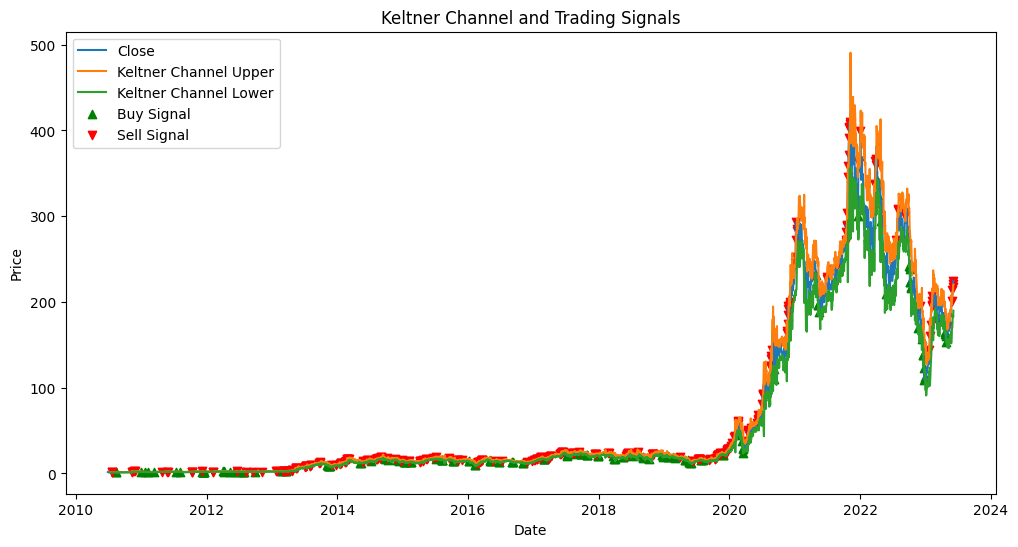

In [25]:
#TASK5
# Step 1: Collect historical data for another index
index_ticker = yf.Ticker('TSLA')  # Change to the desired index ticker
Tesla_data = index_ticker.history(period='max')

# Step 2: Apply the optimized parameters
kc_timeperiod = best_parameters['kc_timeperiod']
bb_timeperiod = best_parameters['bb_timeperiod']
macd_fastperiod = best_parameters['macd_fastperiod']
macd_slowperiod = best_parameters['macd_slowperiod']
macd_signalperiod = best_parameters['macd_signalperiod']

# Calculate Keltner Channel with optimized parameters
Tesla_data['KC_Middle'] = Tesla_data['Close'].rolling(window=kc_timeperiod).mean()
Tesla_data['KC_ATR'] = Tesla_data['High'] - Tesla_data['Low']
Tesla_data['KC_Upper'] = Tesla_data['KC_Middle'] + (2 * Tesla_data['KC_ATR'])
Tesla_data['KC_Lower'] = Tesla_data['KC_Middle'] - (2 * Tesla_data['KC_ATR'])

# Calculate Bollinger Bands with optimized parameters
Tesla_data['BB_Middle'] = Tesla_data['Close'].rolling(window=bb_timeperiod).mean()
Tesla_data['BB_STD'] = Tesla_data['Close'].rolling(window=bb_timeperiod).std()
Tesla_data['BB_Upper'] = Tesla_data['BB_Middle'] + (2 * Tesla_data['BB_STD'])
Tesla_data['BB_Lower'] = Tesla_data['BB_Middle'] - (2 * Tesla_data['BB_STD'])

# Calculate MACD with optimized parameters
Tesla_data['MACD_Line'] = Tesla_data['Close'].ewm(span=macd_fastperiod).mean() - Tesla_data['Close'].ewm(span=macd_slowperiod).mean()
Tesla_data['MACD_Signal'] = Tesla_data['MACD_Line'].ewm(span=macd_signalperiod).mean()
Tesla_data['MACD_Hist'] = Tesla_data['MACD_Line'] - Tesla_data['MACD_Signal']

# Step 3: Generate buy and sell signals
Tesla_data['Signal'] = 0
Tesla_data.loc[Tesla_data['Close'] > Tesla_data['KC_Upper'], 'Signal'] = -1  # Sell signal
Tesla_data.loc[Tesla_data['Close'] < Tesla_data['KC_Lower'], 'Signal'] = 1  # Buy signal

# Step 4: Record the signals, dates, returns, and metrics
Tesla_data['Returns'] = Tesla_data['Close'].pct_change()
Tesla_data['Cumulative_Returns'] = (1 + Tesla_data['Returns']).cumprod()
Tesla_data['Trade_Returns'] = Tesla_data['Signal'].shift() * Tesla_data['Returns']
Tesla_data['Cumulative_Trade_Returns'] = (1 + Tesla_data['Trade_Returns']).cumprod()

# Step 5: Print the generated signals and metrics
print(Tesla_data[['Close', 'KC_Upper', 'KC_Lower', 'Signal', 'Returns', 'Cumulative_Returns', 'Trade_Returns', 'Cumulative_Trade_Returns']])


# Step 6: Plotting the indicators and signals
plt.figure(figsize=(12, 6))
plt.plot(Tesla_data['Close'], label='Close')
plt.plot(Tesla_data['KC_Upper'], label='Keltner Channel Upper')
plt.plot(Tesla_data['KC_Lower'], label='Keltner Channel Lower')

# Create a signal DataFrame with the same index as Tesla_data
signal_data = pd.DataFrame(index=Tesla_data.index)
signal_data['Signal'] = 0
signal_data.loc[Tesla_data['Close'] > Tesla_data['KC_Upper'], 'Signal'] = -1  # Sell signal
signal_data.loc[Tesla_data['Close'] < Tesla_data['KC_Lower'], 'Signal'] = 1  # Buy signal

# Plot the signals at the corresponding dates
buy_signals = signal_data[signal_data['Signal'] == 1]
sell_signals = signal_data[signal_data['Signal'] == -1]
plt.scatter(buy_signals.index, Tesla_data.loc[buy_signals.index, 'Close'], color='green', marker='^', label='Buy Signal')
plt.scatter(sell_signals.index, Tesla_data.loc[sell_signals.index, 'Close'], color='red', marker='v', label='Sell Signal')

plt.legend()
plt.title('Keltner Channel and Trading Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

